<a href="https://colab.research.google.com/github/2303A52328/Explainable_AI/blob/main/Ex_AI_lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/heart.csv")

# Show shape and first few rows
print("Dataset Shape:", df.shape)
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3    0.23  
1   0     3    0.37  
2   0     3    0.24  
3   1     3    0.28  
4   3     2    0.21  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  

In [2]:
# Remove rows containing any null values
df_dropna = df.dropna()
print("After Dropping Missing Values:", df_dropna.shape)

After Dropping Missing Values: (1025, 14)


In [3]:
# Copy dataset
df_imputed = df.copy()

# Loop through columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':  # categorical
            df_imputed[col].fillna(df[col].mode()[0], inplace=True)
        else:  # numerical
            df_imputed[col].fillna(df[col].mean(), inplace=True)

print("After Imputation:")
print(df_imputed.isnull().sum())

After Imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df_minmax = df_imputed.copy()
df_minmax[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

print("\nAfter Min-Max Normalization:")
print(df_minmax.head())


After Min-Max Normalization:
        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000  0.1625  
1  0.500000    0.0  0.00  1.000000  0.3375  
2  0.419355    0.0  0.00  1.000000  0.1750  
3  0.000000    1.0  0.25  1.000000  0.2250  
4  0.306452    0.5  0.75  0.666667  0.1375  


In [5]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

# Apply Z-Score Scaling
scaler = StandardScaler()
df_zscore = df_imputed.copy()
df_zscore[numeric_cols] = scaler.fit_transform(df_imputed[numeric_cols])

print("\nAfter Z-Score Standardization:")
print(df_zscore.head())


After Z-Score Standardization:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.268437  0.661504 -0.915755 -0.377636 -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504 -0.915755  0.479107 -0.833861  2.387330 -1.004049   
2  1.716595  0.661504 -0.915755  0.764688 -1.396233 -0.418878  0.891255   
3  0.724079  0.661504 -0.915755  0.936037 -0.833861 -0.418878  0.891255   
4  0.834359 -1.511706 -0.915755  0.364875  0.930822  2.387330  0.891255   

    thalach     exang   oldpeak     slope        ca      thal    target  
0  0.821321 -0.712287 -0.060888  0.995433  1.209221  1.089852 -1.072484  
1  0.255968  1.403928  1.727137 -2.243675 -0.731971  1.089852 -0.582430  
2 -1.048692  1.403928  1.301417 -2.243675 -0.731971  1.089852 -1.037480  
3  0.516900 -0.712287 -0.912329  0.995433  0.238625  1.089852 -0.897465  
4 -1.874977 -0.712287  0.705408 -0.624121  2.179817 -0.522122 -1.142492  


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# --- Load Dataset ---
df = pd.read_csv("/content/heart.csv")

# --- Ensure target column is integer ---
df['target'] = df['target'].round().astype(int)

# --- Split into Features and Target ---
X = df.drop('target', axis=1)
y = df['target']

print("Dataset Shape:", X.shape)
print("Target Distribution:\n", y.value_counts())

Dataset Shape: (1025, 13)
Target Distribution:
 target
1    526
0    499
Name: count, dtype: int64


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)

print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

🔹 KNN Accuracy: 0.7317073170731707

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [28]:
from sklearn.svm import SVC

# Initialize SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

🔹 SVM Accuracy: 0.6829268292682927

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



In [29]:
from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test)

print("🔹 Neural Network Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))

🔹 Neural Network Accuracy: 0.7804878048780488

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74       102
           1       0.72      0.93      0.81       103

    accuracy                           0.78       205
   macro avg       0.81      0.78      0.78       205
weighted avg       0.81      0.78      0.78       205



In [6]:
df_minmax.to_csv("heart_minmax_scaled.csv", index=False)
df_zscore.to_csv("heart_zscore_scaled.csv", index=False)

print("✅ Files Saved: 'heart_minmax_scaled.csv' and 'heart_zscore_scaled.csv'")

✅ Files Saved: 'heart_minmax_scaled.csv' and 'heart_zscore_scaled.csv'


Class Distribution Before Balancing:
target
0.78    34
0.83    33
0.86    31
0.85    31
0.80    31
0.89    30
0.84    29
0.82    29
0.88    28
0.75    26
0.72    25
0.26    24
0.39    24
0.73    24
0.87    24
0.77    23
0.81    22
0.74    22
0.71    21
0.14    21
0.32    20
0.20    20
0.79    20
0.12    20
0.36    20
0.23    19
0.16    19
0.76    19
0.18    18
0.35    18
0.28    18
0.27    18
0.17    18
0.37    18
0.38    17
0.13    17
0.33    16
0.30    16
0.25    16
0.21    15
0.24    14
0.90    13
0.11    13
0.22    13
0.40    13
0.70    11
0.29    11
0.31    10
0.19     9
0.10     9
0.15     8
0.34     7
Name: count, dtype: int64


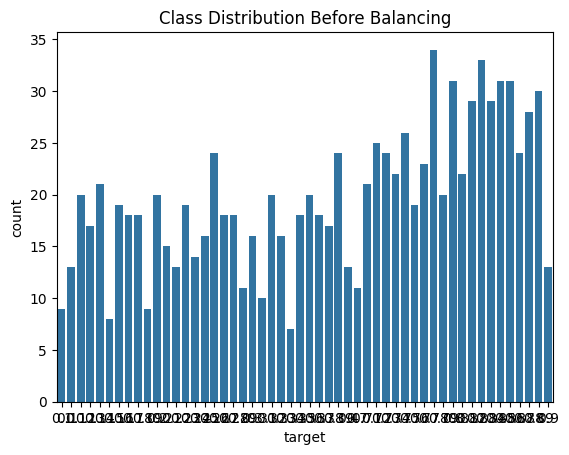

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/heart.csv")

# Check target column (assuming it's named 'target')
print("Class Distribution Before Balancing:")
print(df['target'].value_counts())

# Plot class distribution
sns.countplot(x='target', data=df)
plt.title("Class Distribution Before Balancing")
plt.show()


In [9]:
print(df['target'].unique())
print(df['target'].dtype)

[0.23 0.37 0.24 0.28 0.21 0.78 0.17 0.25 0.87 0.86 0.85 0.2  0.79 0.26
 0.83 0.77 0.71 0.9  0.27 0.8  0.38 0.11 0.84 0.39 0.76 0.88 0.22 0.75
 0.31 0.74 0.32 0.7  0.3  0.29 0.35 0.14 0.72 0.18 0.82 0.12 0.13 0.73
 0.89 0.16 0.33 0.1  0.19 0.81 0.15 0.4  0.36 0.34]
float64


Class Distribution Before Balancing:
target
1    526
0    499
Name: count, dtype: int64


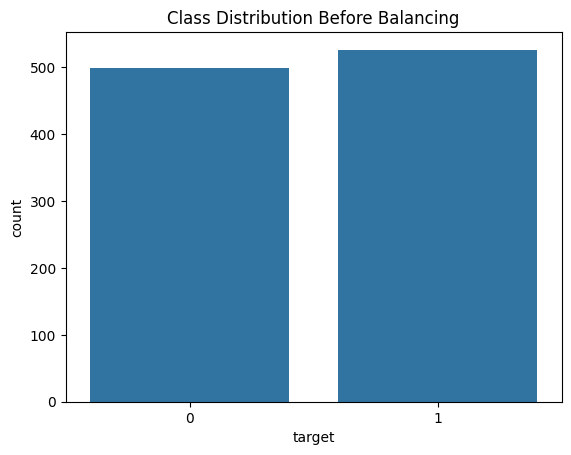

In [11]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load dataset ---
df = pd.read_csv("/content/heart.csv")

# --- Ensure target column is categorical ---
df['target'] = df['target'].round().astype(int)

# --- Separate features (X) and target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- Check class distribution before balancing ---
print("Class Distribution Before Balancing:")
print(y.value_counts())

sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.show()

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The dataset is already balanced, so ADASYN is not needed.
# --- Apply ADASYN Oversampling ---
# adasyn = ADASYN(random_state=42)
# X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# --- Check class distribution after balancing ---
# print("\nClass Distribution After ADASYN:")
# print(y_resampled.value_counts())

# sns.countplot(x=y_resampled)
# plt.title("Class Distribution After ADASYN")
# plt.show()

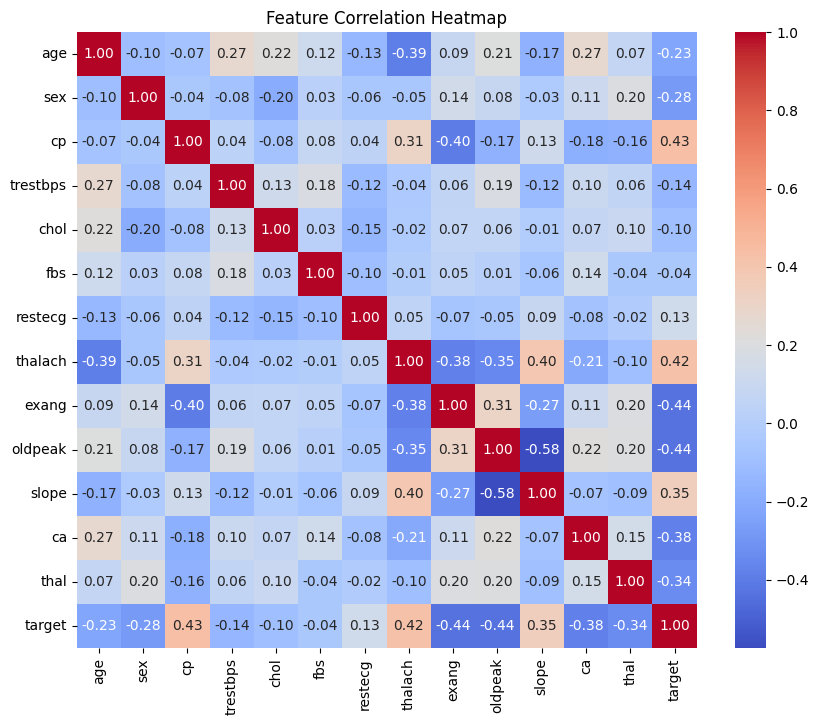

In [12]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Find pairs of correlated features above 0.85
threshold = 0.85
high_corr = set()

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            high_corr.add((i, j))

print("Highly Correlated Feature Pairs (>|0.85|):")
for pair in high_corr:
    print(pair)

Highly Correlated Feature Pairs (>|0.85|):


In [14]:
# Example: drop one variable from each correlated pair
to_drop = set([j for i, j in high_corr])  # keep the first, drop the second
df_reduced = df.drop(columns=to_drop, errors='ignore')

print("Columns Dropped (High Correlation):", to_drop)
print("New Shape:", df_reduced.shape)

Columns Dropped (High Correlation): set()
New Shape: (1025, 14)


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/heart.csv")

# Ensure target column is integer (for classification)
df['target'] = df['target'].round().astype(int)

# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

print("Dataset Shape:", df.shape)

Dataset Shape: (1025, 14)


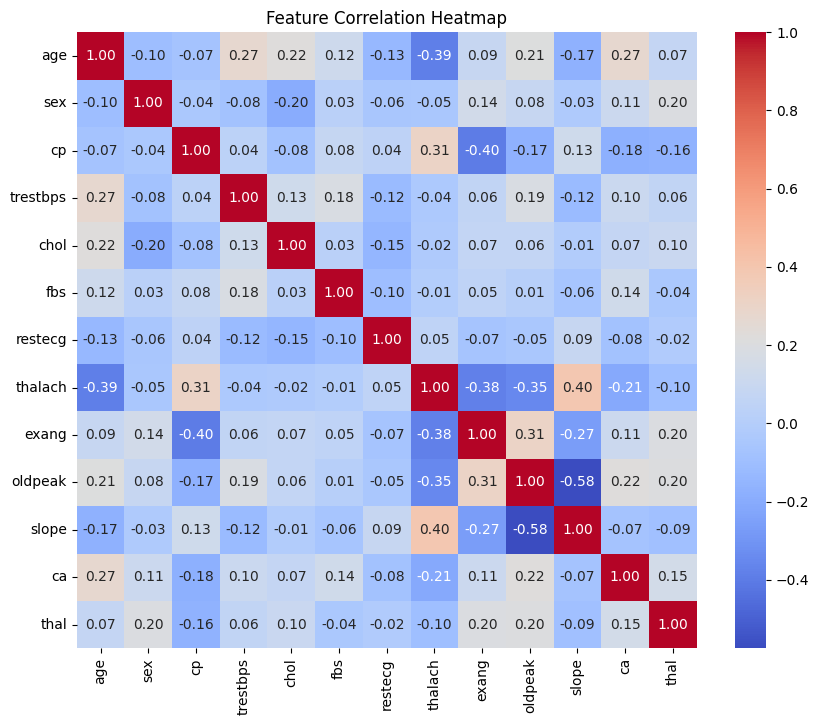

Dropped Highly Correlated Features: set()
Shape After Correlation Feature Selection: (1025, 13)


In [16]:
# Compute correlation matrix
corr_matrix = X.corr(numeric_only=True)

# --- Visualization 1: Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# --- Remove Highly Correlated Features (Threshold > 0.85) ---
threshold = 0.85
to_drop = set()

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            to_drop.add(j)

X_corr_reduced = X.drop(columns=list(to_drop), errors='ignore')

print("Dropped Highly Correlated Features:", to_drop)
print("Shape After Correlation Feature Selection:", X_corr_reduced.shape)

In [35]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_corr_reduced, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model, data=X_train)
shap_values = explainer.shap_values(X_test)

# --- Visualization 2: SHAP Summary Plot ---
# shap.summary_plot(shap_values[1], X_test, plot_type="bar", show=True)

# --- Visualization 3: SHAP Beeswarm Plot ---
# shap.summary_plot(shap_values[1], X_test)

# --- Get Mean Absolute SHAP Values for Feature Ranking ---
# Assuming shap_values is a list where shap_values[1] corresponds to the positive class
if isinstance(shap_values, list):
    # Handle multi-output case (e.g., multi-class classification)
    # For binary classification, shap_values[1] is for the positive class
    # Ensure the mean is calculated to result in a 1D array
    mean_abs_shap_values = np.mean(np.abs(shap_values[1]), axis=0)
else:
    # Handle single-output case (e.g., regression or binary classification from some models)
    mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

print("Shape of shap_values[1]:", shap_values[1].shape)
print("Shape of mean_abs_shap_values:", mean_abs_shap_values.shape)

# Select the second column (index 1) if mean_abs_shap_values is 2D
if mean_abs_shap_values.ndim == 2 and mean_abs_shap_values.shape[1] == 2:
    mean_abs_shap_values = mean_abs_shap_values[:, 1]
elif mean_abs_shap_values.ndim > 1:
     raise ValueError(f"Unexpected shape for mean_abs_shap_values: {mean_abs_shap_values.shape}")


shap_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': mean_abs_shap_values
}).sort_values(by='Importance', ascending=False)

print("\nTop SHAP Important Features:")
print(shap_importance.head(10))

# --- Note: SHAP plotting was attempted but encountered an error. ---
# --- Skipping SHAP plots for now. ---

Shape of shap_values[1]: (13, 2)
Shape of mean_abs_shap_values: (13, 2)

Top SHAP Important Features:
    Feature  Importance
11       ca    0.100949
2        cp    0.089163
12     thal    0.081716
9   oldpeak    0.073681
7   thalach    0.044777
10    slope    0.038350
8     exang    0.037737
1       sex    0.033467
0       age    0.032295
4      chol    0.025023


In [36]:
# Choose top N SHAP features (for example, top 7)
top_features = shap_importance['Feature'].head(7).values

# Final refined dataset (important + less correlated)
X_refined = X_corr_reduced[top_features]

print("\nFinal Selected Features for Modeling:")
print(list(X_refined.columns))


Final Selected Features for Modeling:
['ca', 'cp', 'thal', 'oldpeak', 'thalach', 'slope', 'exang']


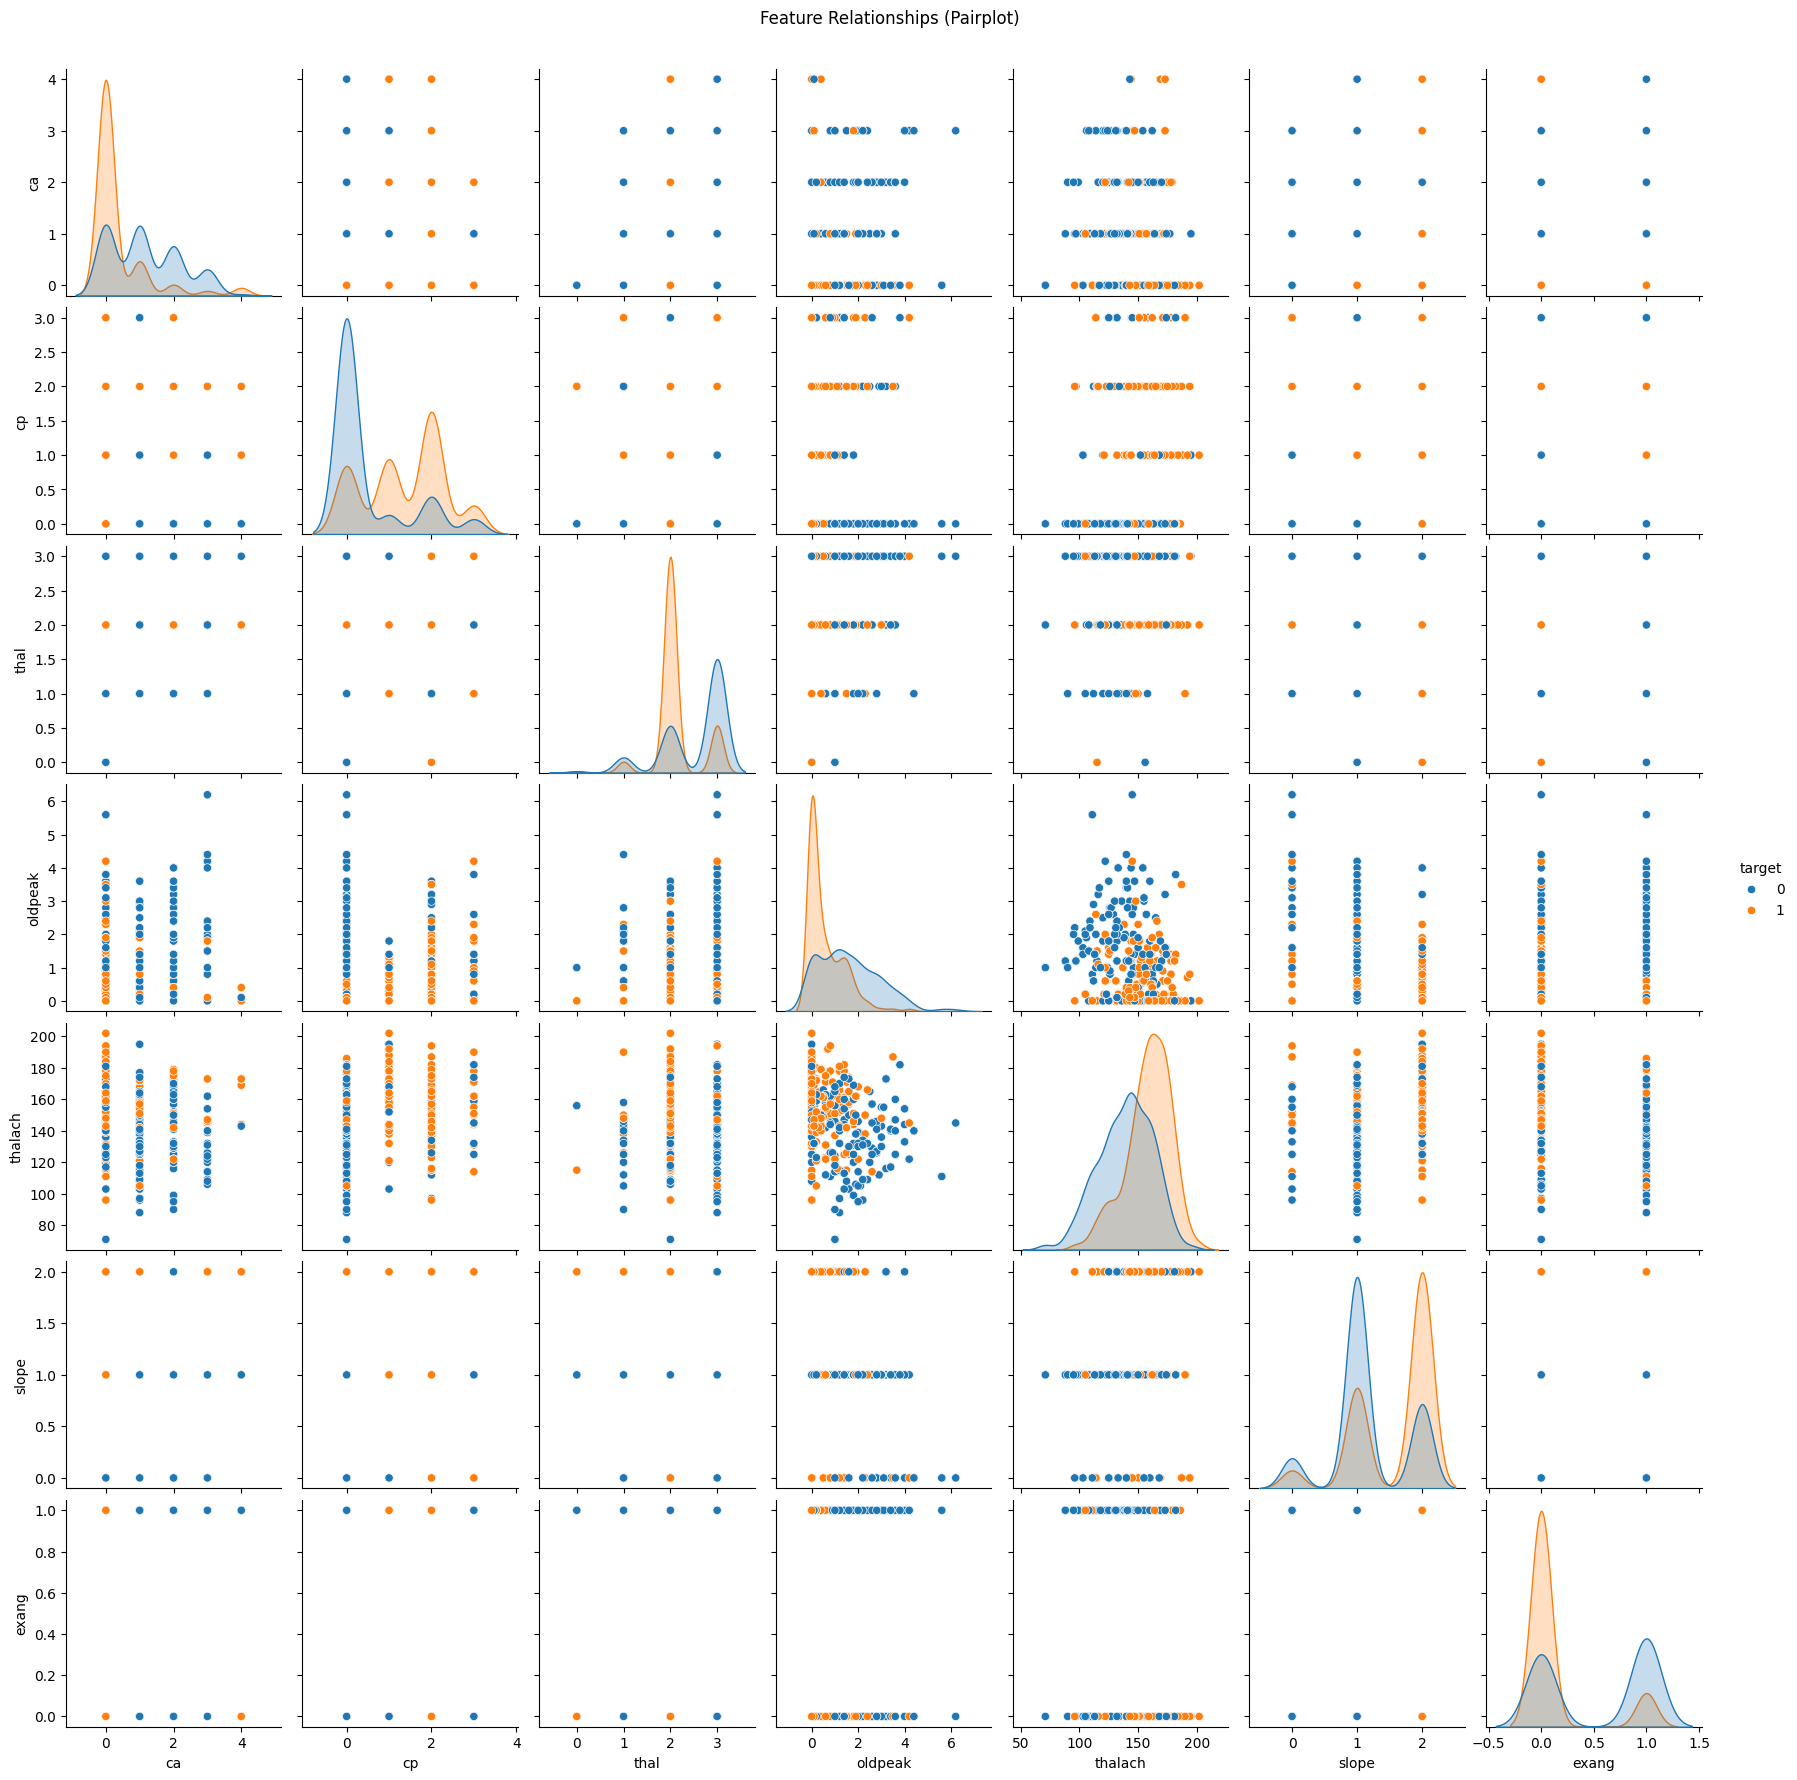

In [37]:
sns.pairplot(df, vars=top_features, hue='target', diag_kind='kde')
plt.suptitle("Feature Relationships (Pairplot)", y=1.02)
plt.show()

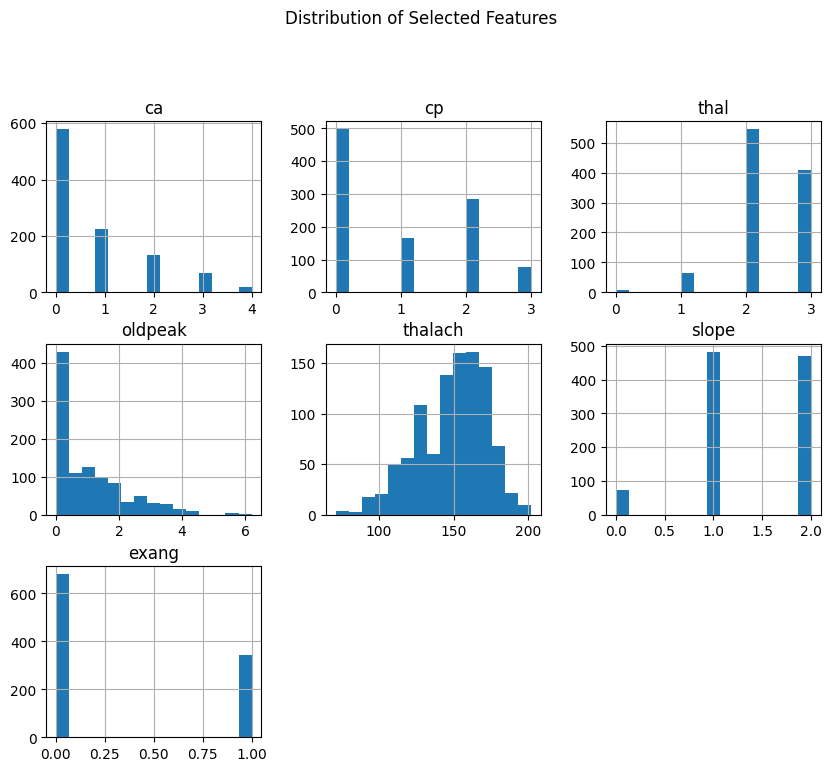

In [38]:
df[top_features].hist(figsize=(10, 8), bins=15)
plt.suptitle("Distribution of Selected Features", y=1.02)
plt.show()

In [39]:
# ==========================================================
# BASIC DATA VISUALIZATION FOR HEART DATASET
# ==========================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Dataset ---
df = pd.read_csv("/content/heart.csv")

# --- Ensure target column is integer ---
df['target'] = df['target'].round().astype(int)

# --- Display dataset info ---
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


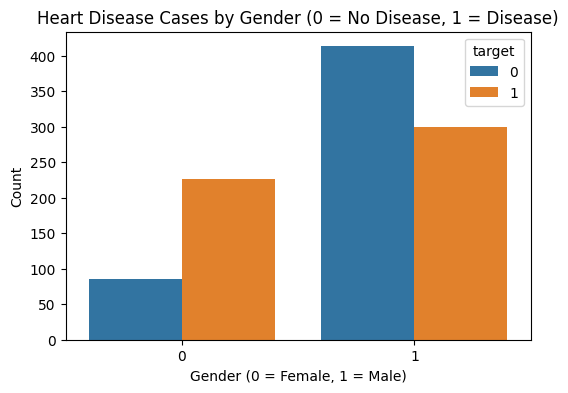

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease Cases by Gender (0 = No Disease, 1 = Disease)")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

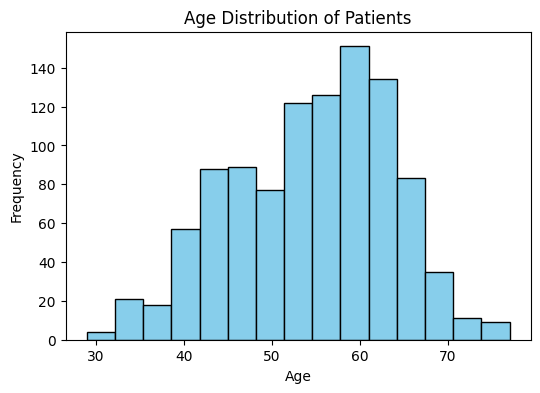

In [41]:
plt.figure(figsize=(6,4))
plt.hist(df['age'], bins=15, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

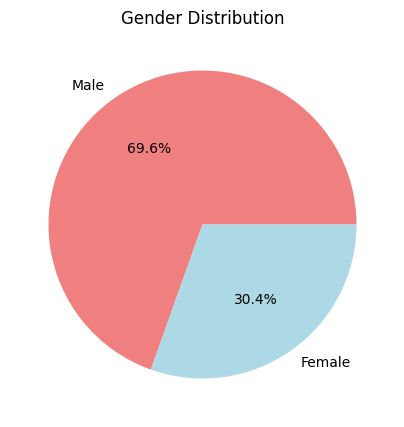

In [42]:
gender_counts = df['sex'].value_counts()
labels = ['Male', 'Female']

plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=['lightcoral','lightblue'])
plt.title("Gender Distribution")
plt.show()

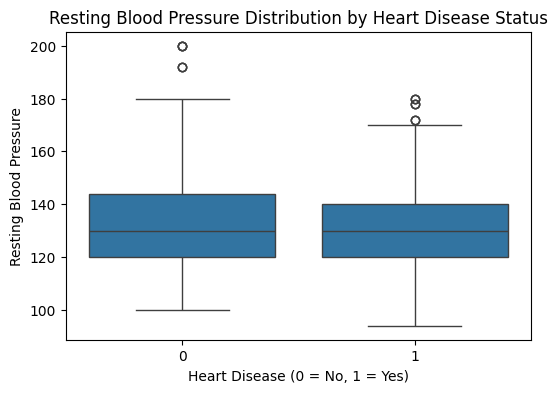

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Resting Blood Pressure Distribution by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting Blood Pressure")
plt.show()

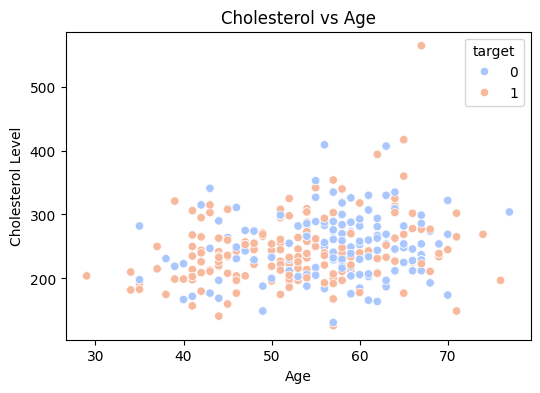

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='chol', hue='target', data=df, palette='coolwarm')
plt.title("Cholesterol vs Age")
plt.xlabel("Age")
plt.ylabel("Cholesterol Level")
plt.show()

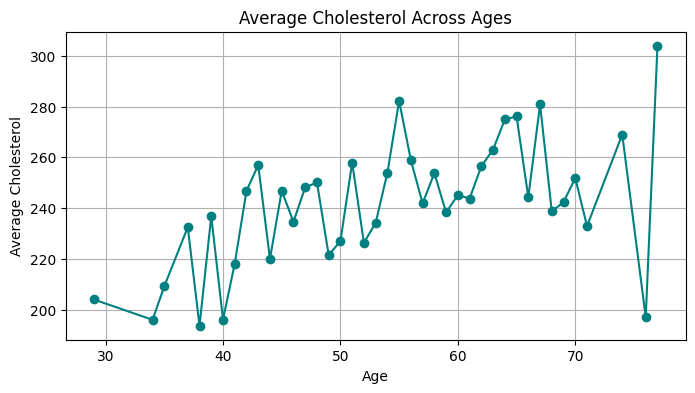

In [45]:
avg_chol = df.groupby('age')['chol'].mean()

plt.figure(figsize=(8,4))
plt.plot(avg_chol.index, avg_chol.values, marker='o', color='teal')
plt.title("Average Cholesterol Across Ages")
plt.xlabel("Age")
plt.ylabel("Average Cholesterol")
plt.grid(True)
plt.show()

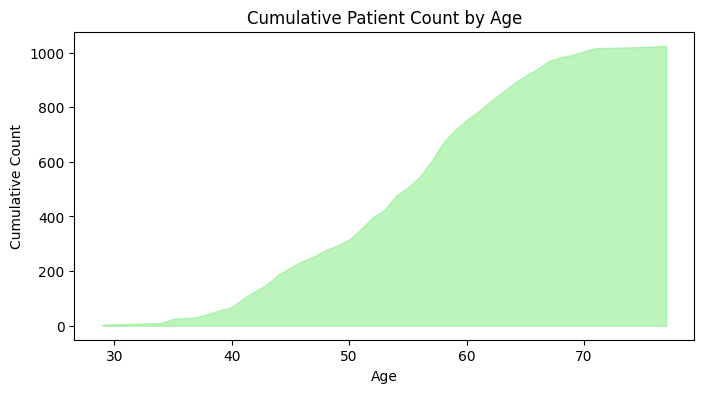

In [46]:
age_counts = df['age'].value_counts().sort_index().cumsum()

plt.figure(figsize=(8,4))
plt.fill_between(age_counts.index, age_counts.values, color='lightgreen', alpha=0.6)
plt.title("Cumulative Patient Count by Age")
plt.xlabel("Age")
plt.ylabel("Cumulative Count")
plt.show()

In [47]:
# ======================================================
# HEART DISEASE — ADVANCED VISUALIZATION & ML MODELS
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
)
# Optional: if available
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# --- 1️⃣ Load and Prepare Dataset ---
df = pd.read_csv("/content/heart.csv")
df['target'] = df['target'].round().astype(int)

X = df.drop('target', axis=1)
y = df['target']

# --- 2️⃣ Train-Test Split and Normalization ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

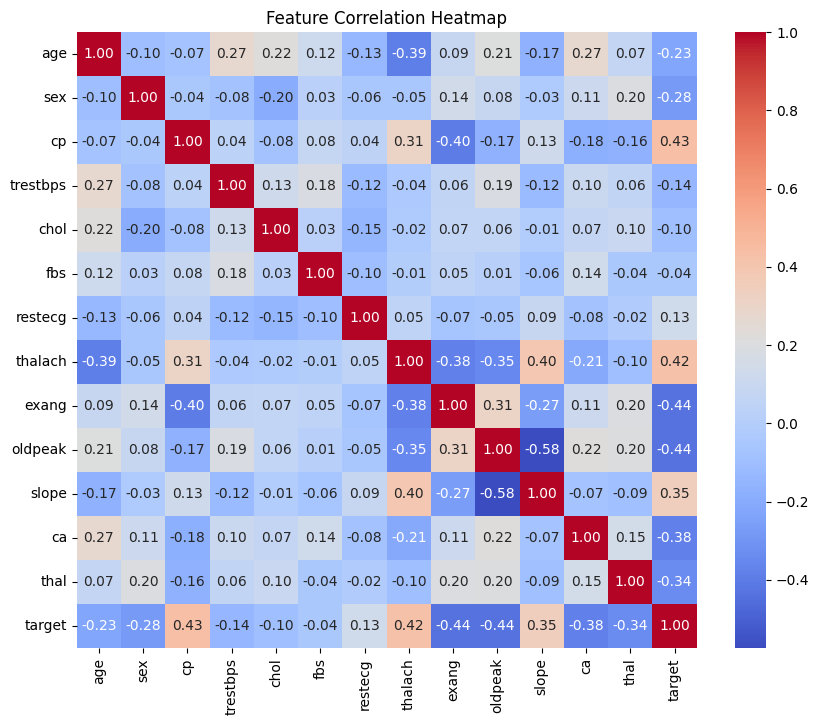

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

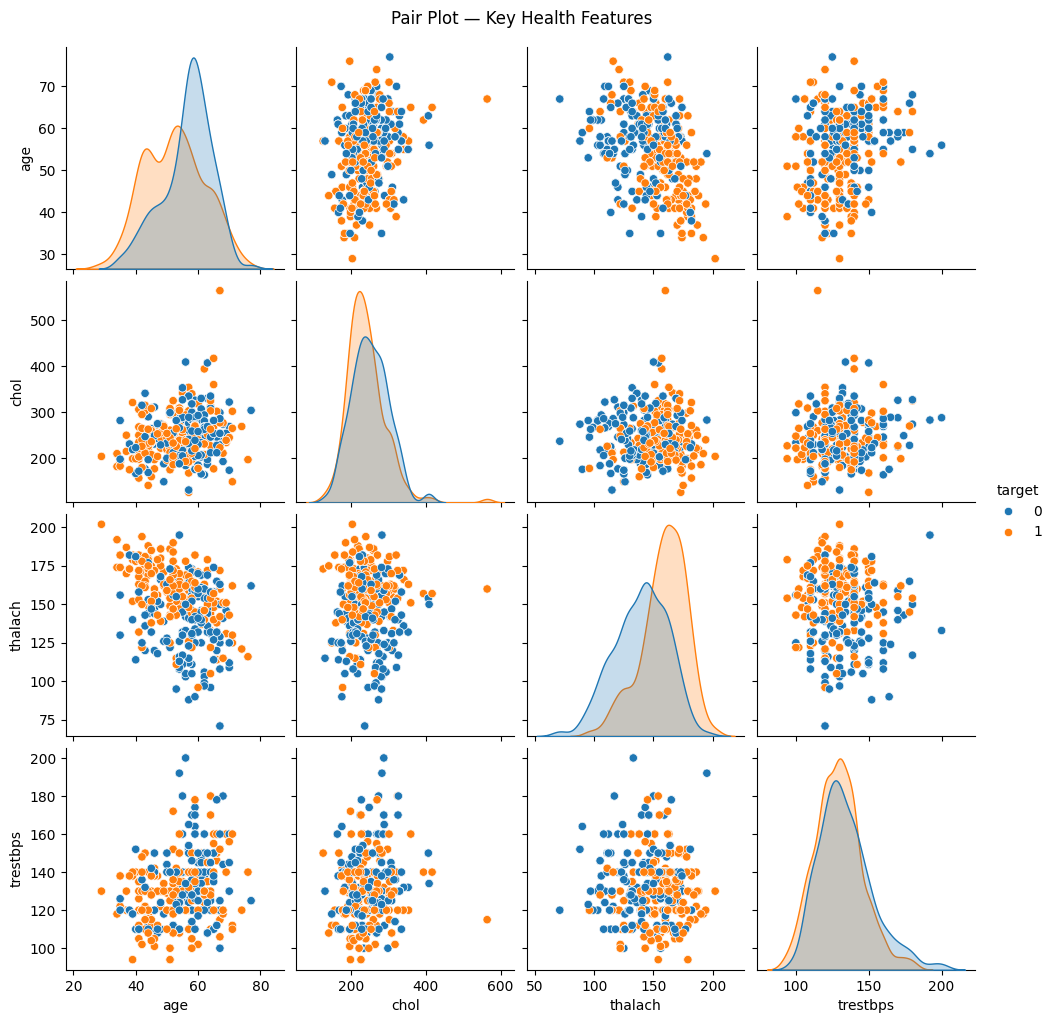

In [49]:
sns.pairplot(df[['age', 'chol', 'thalach', 'trestbps', 'target']], hue='target', diag_kind='kde')
plt.suptitle("Pair Plot — Key Health Features", y=1.02)
plt.show()

/tmp/ipython-input-2072432296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='thalach', data=df, palette='Set2')


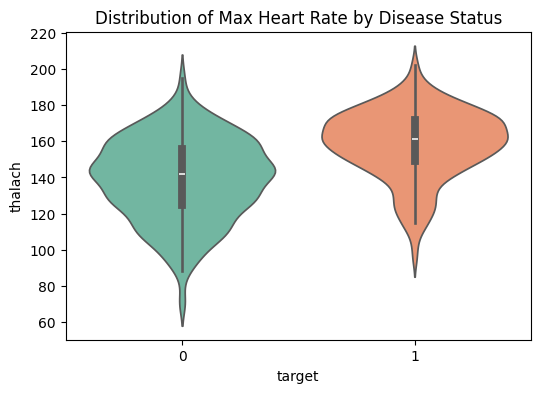

In [50]:
plt.figure(figsize=(6,4))
sns.violinplot(x='target', y='thalach', data=df, palette='Set2')
plt.title("Distribution of Max Heart Rate by Disease Status")
plt.show()

/tmp/ipython-input-3768619206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='target', y='age', data=df, palette='husl')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


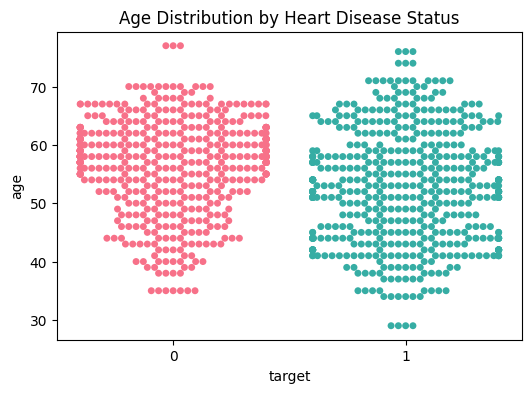

In [51]:
plt.figure(figsize=(6,4))
sns.swarmplot(x='target', y='age', data=df, palette='husl')
plt.title("Age Distribution by Heart Disease Status")
plt.show()

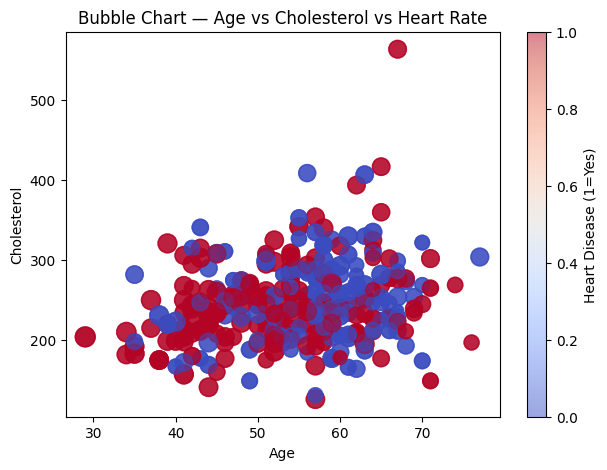

In [52]:
plt.figure(figsize=(7,5))
plt.scatter(df['age'], df['chol'], s=df['thalach'], alpha=0.5, c=df['target'], cmap='coolwarm')
plt.title("Bubble Chart — Age vs Cholesterol vs Heart Rate")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.colorbar(label='Heart Disease (1=Yes)')
plt.show()

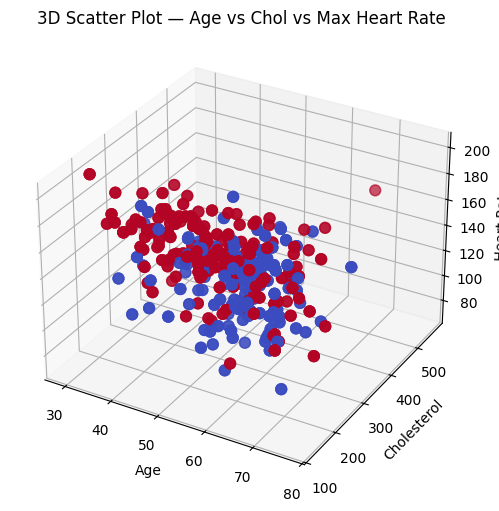

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['chol'], df['thalach'], c=df['target'], cmap='coolwarm', s=60)
ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Heart Rate')
plt.title("3D Scatter Plot — Age vs Chol vs Max Heart Rate")
plt.show()

In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append([name, acc, prec, rec, f1, auc])

# Display Results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\n=== Classical Model Performance ===")
print(results_df)


=== Classical Model Performance ===
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.795122   0.756303  0.873786  0.810811  0.878736
1        Decision Tree  0.985366   1.000000  0.970874  0.985222  0.985437
2                  KNN  0.834146   0.800000  0.893204  0.844037  0.948553
3          Naive Bayes  0.800000   0.754098  0.893204  0.817778  0.870550
4                  SVM  0.887805   0.850877  0.941748  0.894009  0.963164


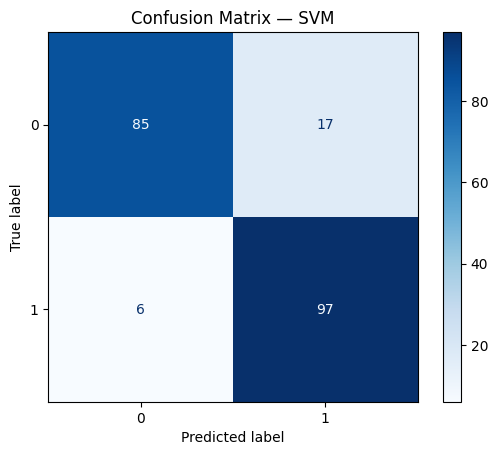

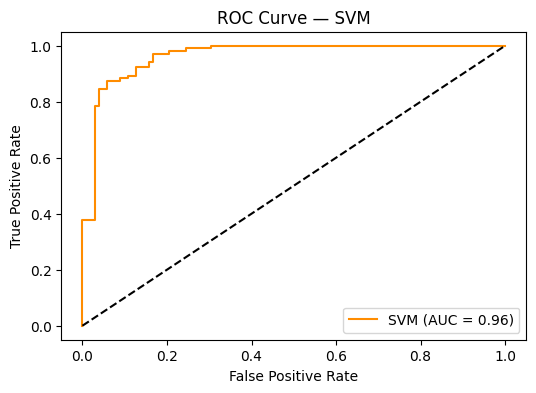

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

svm = models["SVM"]
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:,1]

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix — SVM")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f"SVM (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — SVM")
plt.legend()
plt.show()

In [57]:
ensemble_models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Optional advanced ones (uncomment if available)
# ensemble_models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# ensemble_models["LightGBM"] = LGBMClassifier(random_state=42)
# ensemble_models["CatBoost"] = CatBoostClassifier(verbose=0, random_state=42)

ens_results = []

for name, model in ensemble_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    ens_results.append([name, acc, prec, rec, f1, auc])

ens_df = pd.DataFrame(ens_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\n=== Ensemble Model Performance ===")
print(ens_df)


=== Ensemble Model Performance ===
               Model  Accuracy  Precision    Recall  F1-Score       AUC
0            Bagging  0.985366   1.000000  0.970874  0.985222  0.998287
1      Random Forest  0.985366   1.000000  0.970874  0.985222  1.000000
2        Extra Trees  0.985366   1.000000  0.970874  0.985222  1.000000
3           AdaBoost  0.834146   0.816514  0.864078  0.839623  0.929326
4  Gradient Boosting  0.931707   0.915888  0.951456  0.933333  0.980678


In [58]:
estimators = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# Voting Classifier
voting = VotingClassifier(estimators=estimators, voting='soft')
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)

# Stacking Classifier
stacking = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier())
stacking.fit(X_train, y_train)
stack_pred = stacking.predict(X_test)

print("\nVoting Accuracy:", accuracy_score(y_test, voting_pred))
print("Stacking Accuracy:", accuracy_score(y_test, stack_pred))


Voting Accuracy: 0.926829268292683
Stacking Accuracy: 0.9804878048780488


/tmp/ipython-input-3889411318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=combined, palette='viridis')


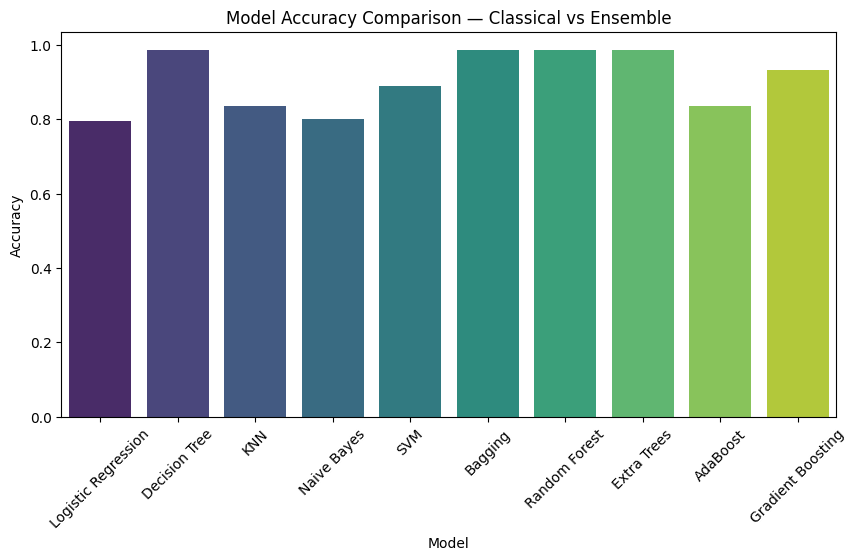

In [59]:
combined = pd.concat([results_df, ens_df])
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=combined, palette='viridis')
plt.title("Model Accuracy Comparison — Classical vs Ensemble")
plt.xticks(rotation=45)
plt.show()

In [60]:
# ======================================================
# HEART DISEASE — DEEP LEARNING COMPARISON
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, BatchNormalization, Input, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
# Load heart dataset
df = pd.read_csv("/content/heart.csv")

# Features & Target
X = df.drop('target', axis=1)
y = df['target'].round().astype(int)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# For CNN — reshape to (samples, timesteps, features)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [64]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")
    return [name, acc, prec, rec, f1, auc]

In [65]:
model_perceptron = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
model_perceptron.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_perceptron.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
res1 = evaluate_model(model_perceptron, X_test, y_test, "Perceptron")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Perceptron Results:
Accuracy: 0.7902 | Precision: 0.7500 | Recall: 0.8738 | F1: 0.8072 | AUC: 0.7898


In [66]:
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
res2 = evaluate_model(model_mlp, X_test, y_test, "MLP")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

MLP Results:
Accuracy: 0.9854 | Precision: 1.0000 | Recall: 0.9709 | F1: 0.9852 | AUC: 0.9854


In [67]:
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_dnn.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
res3 = evaluate_model(model_dnn, X_test, y_test, "Deep Neural Network")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Deep Neural Network Results:
Accuracy: 0.9854 | Precision: 1.0000 | Recall: 0.9709 | F1: 0.9852 | AUC: 0.9854


In [68]:
model_lenet = Sequential([
    Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_lenet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lenet.fit(X_train_cnn, y_train, epochs=80, batch_size=16, verbose=0)
res4 = evaluate_model(model_lenet, X_test_cnn, y_test, "LeNet CNN")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

LeNet CNN Results:
Accuracy: 0.9073 | Precision: 0.9038 | Recall: 0.9126 | F1: 0.9082 | AUC: 0.9073


In [69]:
model_vgg = Sequential([
    Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    Conv1D(32, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Dropout(0.3),
    Conv1D(64, 3, activation='relu', padding='same'),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
model_vgg.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_vgg.fit(X_train_cnn, y_train, epochs=100, batch_size=16, verbose=0)
res5 = evaluate_model(model_vgg, X_test_cnn, y_test, "VGG-like CNN")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

VGG-like CNN Results:
Accuracy: 0.9854 | Precision: 1.0000 | Recall: 0.9709 | F1: 0.9852 | AUC: 0.9854


In [70]:
from tensorflow.keras.layers import Add

input_layer = Input(shape=(X_train.shape[1], 1))
x = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
skip = x
x = Conv1D(32, 3, activation='relu', padding='same')(x)
x = Add()([x, skip])
x = Flatten()(x)
x = Dense(1, activation='sigmoid')(x)
model_resnet = tf.keras.Model(inputs=input_layer, outputs=x)

model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_resnet.fit(X_train_cnn, y_train, epochs=80, batch_size=16, verbose=0)
res6 = evaluate_model(model_resnet, X_test_cnn, y_test, "ResNet-like CNN")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

ResNet-like CNN Results:
Accuracy: 0.9854 | Precision: 1.0000 | Recall: 0.9709 | F1: 0.9852 | AUC: 0.9854



=== Deep Learning Model Performance ===
                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0           Perceptron  0.790244   0.750000  0.873786  0.807175  0.789834
1                  MLP  0.985366   1.000000  0.970874  0.985222  0.985437
2  Deep Neural Network  0.985366   1.000000  0.970874  0.985222  0.985437
3            LeNet CNN  0.907317   0.903846  0.912621  0.908213  0.907291
4         VGG-like CNN  0.985366   1.000000  0.970874  0.985222  0.985437
5      ResNet-like CNN  0.985366   1.000000  0.970874  0.985222  0.985437


/tmp/ipython-input-3905451233.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='plasma')


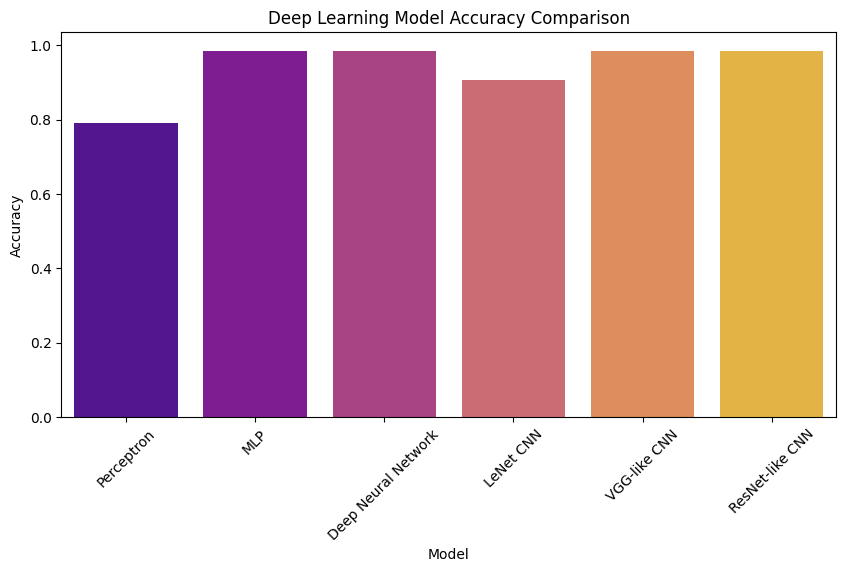

In [71]:
results_df = pd.DataFrame(
    [res1, res2, res3, res4, res5, res6],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
)

print("\n=== Deep Learning Model Performance ===")
print(results_df)

# Visualize performance
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='plasma')
plt.title("Deep Learning Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

In [73]:
# =========================================================
# ADVANCED DEEP LEARNING — RNN / LSTM / GRU / TRANSFORMER
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, SimpleRNN, Bidirectional, Input, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [74]:
# Load dataset
df = pd.read_csv("/content/heart.csv")

X = df.drop('target', axis=1)
y = df['target'].round().astype(int)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for RNN input (samples, timesteps, features)
# Each feature treated as a timestep for sequential models
X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [75]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")
    return [name, acc, prec, rec, f1, auc]

In [76]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [77]:
rnn_model = Sequential([
    SimpleRNN(32, input_shape=(X_train_seq.shape[1], 1), activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = rnn_model.fit(X_train_seq, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])
res1 = evaluate_model(rnn_model, X_test_seq, y_test, "Simple RNN")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Simple RNN Results:
Accuracy: 0.9463 | Precision: 0.9694 | Recall: 0.9223 | F1: 0.9453 | AUC: 0.9465


In [78]:
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_seq.shape[1], 1), return_sequences=False),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = lstm_model.fit(X_train_seq, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])
res2 = evaluate_model(lstm_model, X_test_seq, y_test, "LSTM")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

LSTM Results:
Accuracy: 0.9220 | Precision: 0.8919 | Recall: 0.9612 | F1: 0.9252 | AUC: 0.9218


In [79]:
gru_model = Sequential([
    GRU(64, input_shape=(X_train_seq.shape[1], 1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_gru = gru_model.fit(X_train_seq, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])
res3 = evaluate_model(gru_model, X_test_seq, y_test, "GRU")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

GRU Results:
Accuracy: 0.9463 | Precision: 0.9694 | Recall: 0.9223 | F1: 0.9453 | AUC: 0.9465


In [80]:
bi_lstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_seq.shape[1], 1)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bilstm = bi_lstm_model.fit(X_train_seq, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])
res4 = evaluate_model(bi_lstm_model, X_test_seq, y_test, "Bidirectional LSTM")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Bidirectional LSTM Results:
Accuracy: 0.9073 | Precision: 0.8962 | Recall: 0.9223 | F1: 0.9091 | AUC: 0.9072



=== RNN & Transformer Performance ===
                Model  Accuracy  Precision    Recall  F1-Score       AUC
0          Simple RNN  0.946341   0.969388  0.922330  0.945274  0.946459
1                LSTM  0.921951   0.891892  0.961165  0.925234  0.921759
2                 GRU  0.946341   0.969388  0.922330  0.945274  0.946459
3  Bidirectional LSTM  0.907317   0.896226  0.922330  0.909091  0.907243
4        VGG-like CNN  0.985366   1.000000  0.970874  0.985222  0.985437


/tmp/ipython-input-1907090231.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')


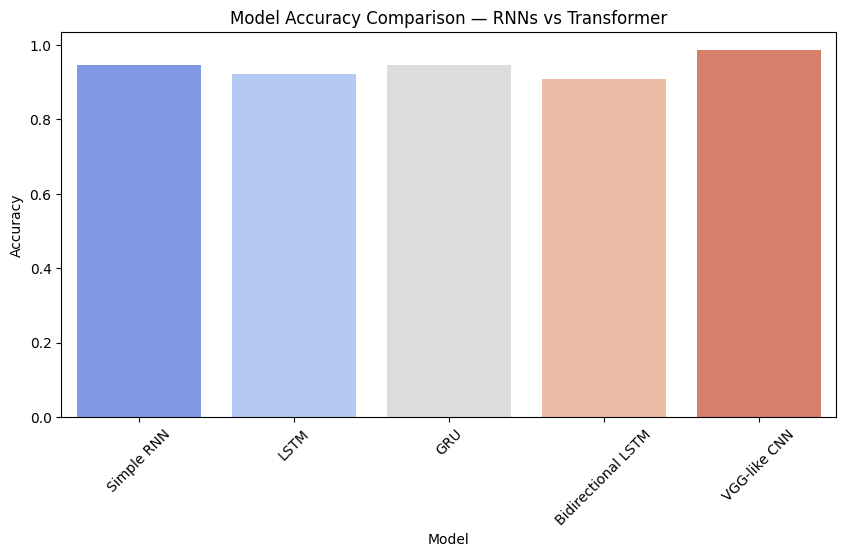

In [81]:
results_df = pd.DataFrame([res1, res2, res3, res4, res5],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

print("\n=== RNN & Transformer Performance ===")
print(results_df)

# Visualize Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='coolwarm')
plt.title("Model Accuracy Comparison — RNNs vs Transformer")
plt.xticks(rotation=45)
plt.show()

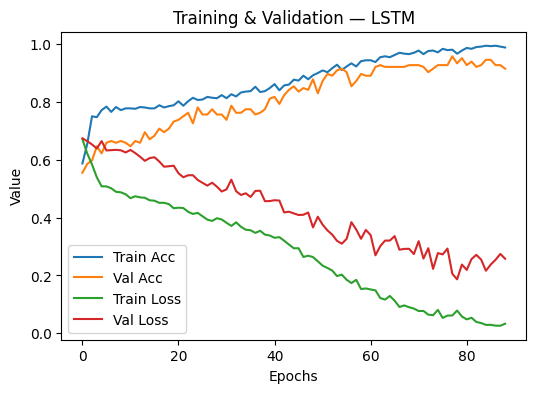

In [82]:
def plot_training(history, title):
    plt.figure(figsize=(6,4))
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f"Training & Validation — {title}")
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

plot_training(history_lstm, "LSTM")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


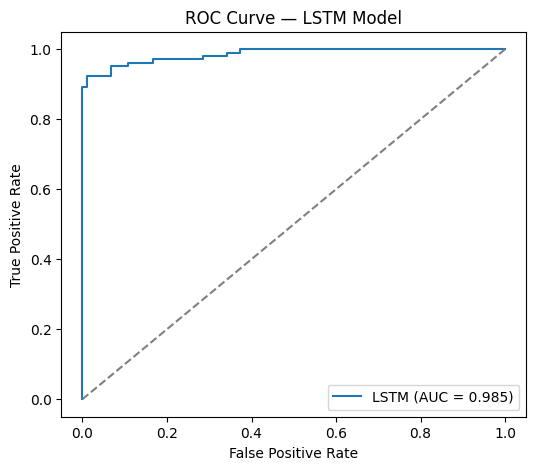

In [83]:
y_pred_prob = lstm_model.predict(X_test_seq)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='LSTM (AUC = {:.3f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — LSTM Model")
plt.legend()
plt.show()